In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import tensorflow as tf # This code has been tested with TensorFlow 1.6


In [2]:
SBI=pd.read_csv('data/SBI/daily_NSE_SBIN.csv')
SBI.set_index('timestamp',inplace=True)
AXISBANK=pd.read_csv('data/SBI/daily_NSE_AXISBANK.csv')
AXISBANK.set_index('timestamp',inplace=True)
BANKBARODA=pd.read_csv('data/SBI/daily_NSE_BANKBARODA.csv')
BANKBARODA.set_index('timestamp',inplace=True)
HDFCBANK=pd.read_csv('data/SBI/daily_NSE_HDFCBANK.csv')
HDFCBANK.set_index('timestamp',inplace=True)
ICICIBANK=pd.read_csv('data/SBI/daily_NSE_ICICIBANK.csv')
ICICIBANK.set_index('timestamp',inplace=True)
PNB=pd.read_csv('data/SBI/daily_NSE_PNB.csv')
PNB.set_index('timestamp',inplace=True)



In [3]:
SBI['SBI']=SBI['close']
AXISBANK['AXISBANK']=AXISBANK['open']
BANKBARODA['BANKBARODA']=BANKBARODA['open']
HDFCBANK['HDFCBANK']=HDFCBANK['open']
ICICIBANK['ICICIBANK']=ICICIBANK['open']
PNB['PNB']=PNB['open']

dataSet=pd.concat([SBI, AXISBANK, BANKBARODA,HDFCBANK,ICICIBANK,PNB], axis=1)
dataSet=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB','SBI']]
dataSet=dataSet.dropna()
dataSet

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
2002-07-01,7.61,12.80,40.0000,25.4182,9.60,22.8379
2002-07-02,7.88,12.08,42.6000,25.4545,9.60,22.8143
2002-07-03,7.80,12.38,42.0000,26.7273,9.46,22.5879
2002-07-04,7.80,12.23,42.0600,28.1818,9.56,22.6728
2002-07-05,8.02,12.19,43.6900,27.0909,9.90,22.7672
2002-07-08,7.90,11.80,42.3500,27.8818,9.90,22.8190
2002-07-09,8.16,11.82,42.4600,27.4000,9.90,22.7200
2002-07-10,8.39,12.20,42.0000,27.2364,9.76,22.9747
2002-07-11,8.51,12.19,42.2000,27.0818,9.70,22.1775
2002-07-12,8.19,12.20,42.2000,27.2727,9.45,22.1208


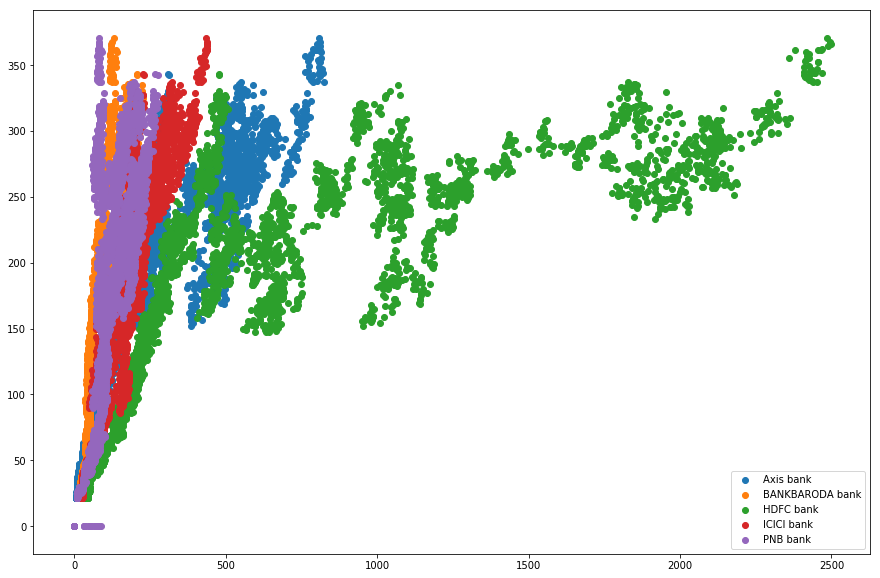

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(dataSet['AXISBANK'],dataSet['SBI'],label='Axis bank')
plt.scatter(dataSet['BANKBARODA'],dataSet['SBI'],label='BANKBARODA bank')
plt.scatter(dataSet['HDFCBANK'],dataSet['SBI'],label='HDFC bank')
plt.scatter(dataSet['ICICIBANK'],dataSet['SBI'],label='ICICI bank')
plt.scatter(dataSet['PNB'],dataSet['SBI'],label='PNB bank')
plt.legend()
plt.show()

In [5]:
results = sm.ols(formula='SBI ~ AXISBANK', data=dataSet).fit()

In [6]:
Y_pred = results.predict(dataSet[["AXISBANK"]])

In [7]:

residual = dataSet["SBI"].values-Y_pred

In [8]:
residual

2002-07-01   -57.571915
2002-07-02   -57.701324
2002-07-03   -57.896374
2002-07-04   -57.811474
2002-07-05   -57.803289
2002-07-08   -57.704462
2002-07-09   -57.905353
2002-07-10   -57.740787
2002-07-11   -58.585013
2002-07-12   -58.516309
2002-07-15   -58.728523
2002-07-16   -59.068123
2002-07-17   -58.865409
2002-07-18   -58.752383
2002-07-19   -58.936196
2002-07-22   -59.006996
2002-07-23   -58.655860
2002-07-24   -58.881406
2002-07-25   -59.099621
2002-07-26   -59.181730
2002-07-29   -58.669353
2002-07-30   -58.869115
2002-07-31   -58.186317
2002-08-01   -58.660126
2002-08-02   -58.429187
2002-08-05   -58.891006
2002-08-06   -58.576107
2002-08-07   -58.256075
2002-08-08   -58.544222
2002-08-09   -58.414306
                ...    
2019-05-24   -27.533817
2019-05-27   -26.885772
2019-05-28   -37.274850
2019-05-29   -44.932330
2019-05-30   -38.660726
2019-05-31   -42.747849
2019-06-03   -40.797161
2019-06-04   -41.495839
2019-06-06   -63.442379
2019-06-07   -53.237038
2019-06-10   -49

In [9]:
x_data=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB']]
y_data=dataSet[['SBI']]

In [10]:
print(x_data.shape)
print(y_data.shape)

(4240, 5)
(4240, 1)


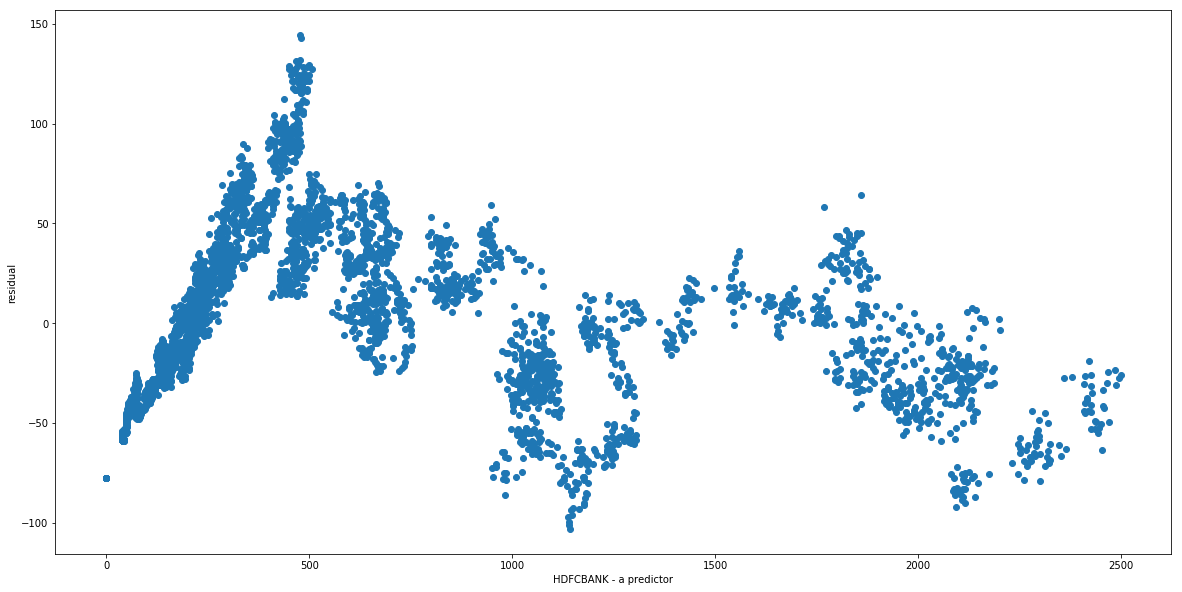

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(dataSet[["HDFCBANK"]],residual)
plt.xlabel("HDFCBANK - a predictor")
plt.ylabel("residual")
plt.show()

In [12]:
results = sm.ols(formula='SBI~AXISBANK+BANKBARODA+HDFCBANK+ICICIBANK+PNB',data =dataSet).fit()
results

In [13]:
Y_ols_pred=results.predict(x_data)


In [14]:
x_data.columns.values

array(['AXISBANK', 'BANKBARODA', 'HDFCBANK', 'ICICIBANK', 'PNB'],
      dtype=object)

In [15]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_data = pd.DataFrame(scaler.fit_transform(x_data),columns=x_data.columns.values)
y_data = pd.DataFrame(scaler.fit_transform(y_data),columns=y_data.columns.values)


In [16]:
y_data

,SBI
0,0.061616
1,0.061552
2,0.060941
3,0.061170
4,0.061425
5,0.061565
6,0.061298
7,0.061985
8,0.059834
9,0.059681


In [17]:
Y_ols_pred

2002-07-01     12.702806
2002-07-02     12.876292
2002-07-03     13.059778
2002-07-04     13.542536
2002-07-05     13.582509
2002-07-08     13.780749
2002-07-09     13.688113
2002-07-10     13.524368
2002-07-11     13.459235
2002-07-12     13.273901
2002-07-15     14.544382
2002-07-16     13.152339
2002-07-17     13.177365
2002-07-18     13.103689
2002-07-19     12.318597
2002-07-22     12.916031
2002-07-23     12.913788
2002-07-24     12.616868
2002-07-25     13.234061
2002-07-26     12.379101
2002-07-29     12.392669
2002-07-30     12.688766
2002-07-31     12.052763
2002-08-01     12.304345
2002-08-02     13.502184
2002-08-05     12.969493
2002-08-06     12.489663
2002-08-07     12.601149
2002-08-08     12.231432
2002-08-09     12.300115
                 ...    
2019-05-24    328.060322
2019-05-27    337.040197
2019-05-28    343.260478
2019-05-29    336.213465
2019-05-30    332.020618
2019-05-31    335.536221
2019-06-03    334.027933
2019-06-04    332.755053
2019-06-06    334.112186


In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.248e+04
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:45:22   Log-Likelihood:                -18122.
No. Observations:                4240   AIC:                         3.626e+04
Df Residuals:                    4234   BIC:                         3.629e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3835      0.731     -3.259      0.001      -3.817      -0.950
AXISBANK       0.1391      0.006     21.436      0.000       0.126       0.152
BANKBARODA    -0.0881      0.016     -5.397      0.000      -0.120      -0.056
HDFCBANK       0.0241      0.002     15.483      0.000       0.021       0.027
ICICIBANK      0.2692      0.010     25.998      0.000       0.249       0.290
PNB            0.7653      0.013     59.119      0.000       0.740       0.791
==============================================================================
Omnibus:                       91.171   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.691
Skew:                           0.176   Prob(JB):                     4.02e-14
Kurtosis:                       2.526   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
co_relations=dataSet.corr()

In [20]:
co_relations

,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
AXISBANK,1.000000,0.767618,0.940925,0.943636,0.393810,0.877813
BANKBARODA,0.767618,1.000000,0.618432,0.776891,0.823702,0.901898
HDFCBANK,0.940925,0.618432,1.000000,0.887263,0.206565,0.770733
ICICIBANK,0.943636,0.776891,0.887263,1.000000,0.500752,0.918564
PNB,0.393810,0.823702,0.206565,0.500752,1.000000,0.736258
SBI,0.877813,0.901898,0.770733,0.918564,0.736258,1.000000


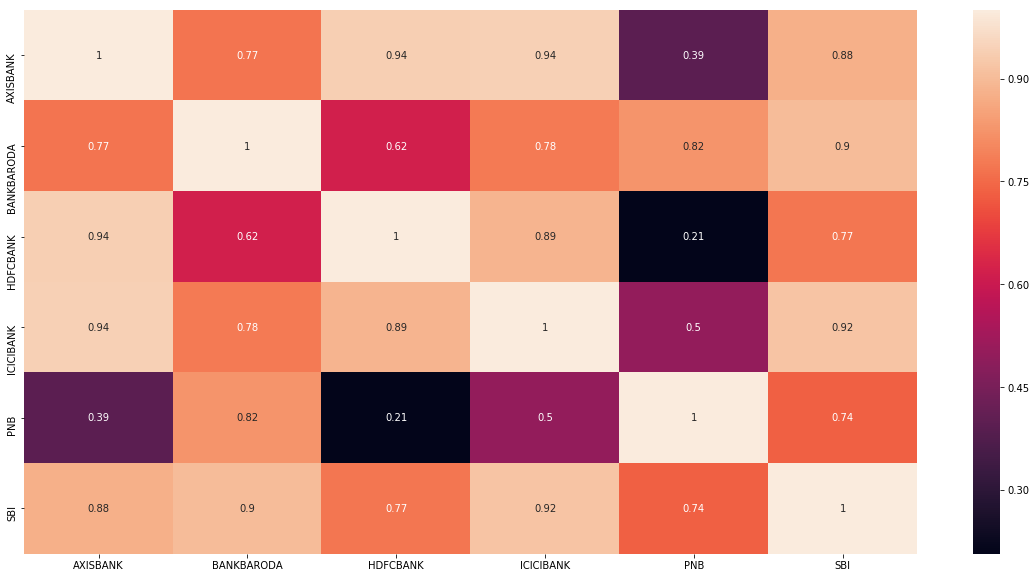

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(co_relations, annot=True)
plt.show()

## Tensorflow Starts 

In [22]:
import tensorflow as tf
n=5
y_data.shape
n_stocks = 500
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1

(4240, 1)

In [43]:
x = tf.placeholder(tf.float32, [None,n],name='x')
#w=tf.Variable(tf.ones([n,1]),name='w')
#b=tf.Variable(tf.zeros([1]),name='b')
y = tf.placeholder(tf.float32, [None,1],name='y')
#h = tf.matmul(x, w)+b

W_1 = tf.Variable(tf.ones([n,5]))
b_1 = tf.Variable(tf.zeros([5]))
layer_1 = tf.add(tf.matmul(x,W_1), b_1)
layer_1 = tf.nn.leaky_relu(layer_1)

W_2 = tf.Variable(tf.ones([5,5]))
b_2 = tf.Variable(tf.zeros([1]))
layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
layer_2 = tf.nn.leaky_relu(layer_2)


W_O = tf.Variable(tf.ones([5,5]))
b_O = tf.Variable(tf.zeros([1]))
output = tf.add(tf.matmul(layer_2,W_O), b_O)
# output = tf.nn.sigmoid(output)


In [44]:
loss_op = tf.reduce_mean(tf.square(tf.subtract(output, y)), name="loss")

In [45]:
train_step_constant=tf.train.GradientDescentOptimizer(0.01).minimize(loss_op)

In [46]:
batch=100

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for batch in range(10000):
     
        sess.run(train_step_constant, feed_dict={
            x: x_data,
            y: y_data
        })
      
    w_computed = sess.run(W_1)
    b_computed = sess.run(b_1)

  
    
    print(sess.run(loss_op, feed_dict={
            x: x_data,
            y: y_data
        }))    
print(w_computed,b_computed)


0.04789902
[[-0.6034125  -0.6034125  -0.6034125  -0.6034125  -0.6034125 ]
 [-1.1644     -1.1644     -1.1644     -1.1644     -1.1644    ]
 [-0.37065876 -0.37065876 -0.37065876 -0.37065876 -0.37065876]
 [-0.8825521  -0.8825521  -0.8825521  -0.8825521  -0.8825521 ]
 [-0.90229386 -0.90229386 -0.90229386 -0.90229386 -0.90229386]] [-3.8981135 -3.8981135 -3.8981135 -3.8981135 -3.8981135]


In [48]:
t=dataSet[3000:3001].values
t

array([[366.   , 167.8  , 826.   , 257.273, 193.5  , 258.31 ]])

In [49]:
type(t)

numpy.ndarray

In [50]:
tt=t[:,:-1]
tt

array([[366.   , 167.8  , 826.   , 257.273, 193.5  ]])

In [51]:
np.matmul(tt,w_computed)+b_computed


array([[-1127.94822579, -1127.94822579, -1127.94822579, -1127.94822579,
        -1127.94822579]])

In [52]:
x1_data = scaler.fit_transform(tt)

In [53]:
x1_data

array([[0., 0., 0., 0., 0.]])